In [36]:
# from datasets import load_dataset
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# import data
df = pd.read_csv("/goinfre/hrami/python_for_data/data_jobs.csv")

# data cleanup
df['job_posted_date'] = pd.to_datetime(df.job_posted_date)
usa_job = df[df['job_country'] == 'United States'].copy()
usa_job['job_posted_month'] = usa_job['job_posted_date'].dt.strftime('%B')
pivot_usa = usa_job.pivot_table(index='job_posted_month', columns='job_title_short', aggfunc='size')
pivot_usa.reset_index(inplace=True)
pivot_usa['month_nu'] = pd.to_datetime(pivot_usa['job_posted_month'], format='%B').dt.month
pivot_usa.sort_values('month_nu', inplace=True)
pivot_usa.set_index('job_posted_month', inplace=True)

merge  data frame

In [ ]:
usa_job_software =  pd.read_csv("https://lukeb.co/software_csv", index_col='job_posted_month')
pivot_usa

In [64]:
df_usa_merged = pivot_usa.merge(usa_job_software, on="job_posted_month")


In [65]:
top_6 = fd_usa_merged.sum().sort_values(ascending=False).head(6).index.to_list()

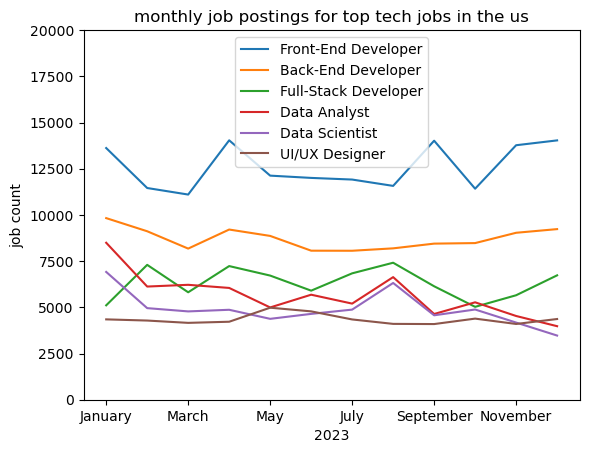

In [72]:
df_usa_merged[top_6].plot(kind='line')
plt.title('monthly job postings for top tech jobs in the us')
plt.xlabel('2023')
plt.ylabel('job count')
plt.ylim(0, 20000)
plt.legend()
plt.show()